(system)=
# Sensorsysteme beurteilen

## Lernziele für den Abschnitt *Sensorsysteme beurteilen*

<div class="admonition note" style="background: #e5f1ff; padding: 10px">
<div class="title"><b>Lernziele für den Abschnitt:</b></div>
    <ul>
        <li> Sensoren im Sensorsystem bewerten </li>
        <li> mithilfe von physikalischen und elektrischen Zusammenhängen </li>
        <li> um die Fähigkeiten und Grenzen zu beurteilen </li>
    </ul>
</div>

## python konfigurieren

### Module importieren

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import schemdraw
import schemdraw.elements as elm
import numpy as np
import scipy
from scipy.stats import norm
import pandas as pd
import locale
import distutils.spawn
from distutils.spawn import find_executable
import IPython.display
from IPython.display import display, Latex, IFrame

print('matplotlib', matplotlib.__version__)
print('numpy', np.__version__)
print('scipy', scipy.__version__)
print('pandas', pd.__version__)
print('locale', locale)
print('distutils.spawn', distutils.spawn)
print('IPython.display', IPython.display)
print('schemdraw', schemdraw.__version__)

matplotlib 3.7.1
numpy 1.24.2
scipy 1.10.1
pandas 1.5.3
locale <module 'locale' from '/home/franzi/.pyenv/versions/miniconda3-latest/envs/sen/lib/python3.10/locale.py'>
distutils.spawn <module 'distutils.spawn' from '/home/franzi/.pyenv/versions/miniconda3-latest/envs/sen/lib/python3.10/site-packages/setuptools/_distutils/spawn.py'>
IPython.display <module 'IPython.display' from '/home/franzi/.pyenv/versions/miniconda3-latest/envs/sen/lib/python3.10/site-packages/IPython/display.py'>
schemdraw 0.15


### Grafikparameter einstellen

In [2]:
plt.rcParams['savefig.dpi'] = 75
plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 10, 6
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 18
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 18
locale.setlocale(locale.LC_ALL, '')
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16

if find_executable('latex'):
    plt.rcParams['text.usetex'] = True
    pd.set_option('display.latex.repr', True)
    pd.set_option('display.latex.longtable', True)

## Unterschied zwischen aktiven und passiven Sensoren

| **Passive Sensoren** | **Aktive Sensoren** |
|---|---|
| Verändern ihre elektrischen Eigenschaften unter dem Einfluss einer nichtelektrischen physikalischen Größe, z. B. Temperaturwiderstand $R = f(T)$ | Wandeln eine nichtelektrische physikalische Größe in eine elektrische Größe um, z. B. Beleuchtungsstärke $\to$ Spannung, physikalisch gesehen stellen sie Energiewandler dar, erforderliche Energie wird Messgröße entzogen |
| benötigen zur Auswertung Hilfsenergie | keine Hilfsenergie zur Auswertung nötig |
| Beispiele für Sensoren: Widerstandsthermometer $R(T)$, Dehnungsmessstreifen $R(\Delta\text{Laenge}), R(F)$, Photowiderstand $R(\text{Intensitaet Strahlung})$, kapazitive Sensoren $C(\text{Abstand, Winkel})$, induktive Sensoren $L(\text{Abstand, Winkel})$ | Beispiele für Sensoren: Thermoelement $U = f(U_{\text{Betrieb}}, \Delta T)$, Piezokristall $p = f(U_{\text{Betrieb}}, \Delta q)$, Photodiode $I = f(U_{\text{Betrieb}}, \text{Strahlung})$ |

## Sensoren als Wandler

![Wandler](../img/system-converter.png)

## Beispiele für kombinierte Messprinzipien

Laufzeitmessung: Zeit zwischen Signal 1 und Signal 2

Aktive Herstellung eines stationären Zustands (z. B. mit Heizer beim Massenflusssensor) und Messung der nötigen Regelgröße (im Beispiel nötige Heizleistung für konstante Temperatur)

Messung Rückreflexion, die sich mit dem Medium verändert (Reflexions-Lichtschranke $\to$ Lichtwellen oder auch Sonografie $\to$ Schallwellen)

Arrays von Sensoren für Bildinformationen

Kompensation von Temperatureffekten

Beschleunigungsmessung über Abstandsmessung

## Sensitivität (= Empfindlichkeit) und Querempfindlichkeit

Definition Sensitivität = Empfindlichkeit

\begin{equation}
\text{Sensitivitaet }S = \frac{\Delta\text{Sensorausgangssignal}}{\Delta\text{Messgroesse}}
\end{equation}

$\to$ bei nichtlinearen Kennlinien abhängig vom Arbeitspunkt / Messbereich

![Sensitivity](../img/system-sensitivity.png)

Definition Querempfindlichkeit = Empfindlichkeit Sensorsignal auf weitere vorhandene Effekte, z. B. CO-Sensor misst $\text{CH}_4$

\begin{equation}
\text{Querempfindlichkeit} = \frac{\Delta \text{Sensorausgangssignal}}{\Delta\text{Stoergroesse}}
\end{equation}

kann auch dazu benutzt werden, rechnerisch das Sensorsignal für mehrere Größen auszuwerten, ggf. unter Zuhilfenahme mehrerer unterschiedlicher Sensoren ($\to$ Sensorfusion)

Relative Empfindlichkeit: hier ist die Referenz zu definieren, Beispiele:

\begin{equation}
\frac{S_{\text{Arbeitspunkt}}}{S_{\text{max}}}
\end{equation}

\begin{equation}
\frac{S_{\text{Arbeitspunkt}}}{S_{\text{Referenzsensor}}}
\end{equation}

## Intelligente Sensoren: Sensoren mit integrierter Messdatenverarbeitung

**Ein intelligenter Sensor wandelt physikalische und / oder chemische Signale in elektrische, digitalisiert sie und führt selbständig Signalverarbeitungen durch.** {cite:p}`hoffmann_taschenbuch_2015`

*Internationale Bezeichnung* **Smart Sensor** ist etwas weiter gefasst: auch mit analoger Vorverarbeitung des Messsignals gilt dieser schon als *smart*. {cite:p}`parthier_messtechnik:_2016`

![smart](../img/system-smart.png)

**Neue Möglichkeiten** ggü. *nicht intelligenten Sensoren* {cite:p}`hoffmann_taschenbuch_2015`: 
- einfache Korrekturen von Störgrößen wie Langzeitdrift und Offset
- Nichtlineare Kennlinien mit Hilfe von Korrekturtabellen korrigierbar, damit Sensortoleranzen und Alterungseffekte berücksichtigbar
- Kalibrierungen am einzelnen Sensor für bestimmte Anwendungen nicht mehr nötig
- Bei Einsatz von Sensorarrays kann Sensorfusion (z. B. Temperaturkompensation) direkt in der Nähe des Messortes stattfinden $\to$ erhöhte Störsicherheit
- Direkte Kombination mit Aktoren (Gegenstück zum Sensor: reagiert auf Spannung mit $T$-Änderung, Kraft, etc.), deren Regelung ebenfalls im Mikrocontroller erfolgt, besonders interessant hier: Selbsttestfunktion realisierbar
- bei Bedarf Integration von Kommunikationseinheit (z. B. Antenne im Reifendrucksensor) und *Energiequelle* (z. B. Solarzelle) möglich

## Beispiel für ein Sensorsystem: Kohlendioxid-Sensor

<a title="Sensirion AG, CC BY-SA 4.0 &lt;https://creativecommons.org/licenses/by-sa/4.0&gt;, via Wikimedia Commons" href="https://commons.wikimedia.org/wiki/File:Carbon_Dioxide_Sensor_SCD4x.jpg"><img width="512" alt="Carbon Dioxide Sensor SCD4x" src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/2e/Carbon_Dioxide_Sensor_SCD4x.jpg/512px-Carbon_Dioxide_Sensor_SCD4x.jpg"></a>

<a href="https://commons.wikimedia.org/wiki/File:Carbon_Dioxide_Sensor_SCD4x.jpg">Sensirion AG</a>, <a href="https://creativecommons.org/licenses/by-sa/4.0">CC BY-SA 4.0</a>, via Wikimedia Commons

Sensirion schreibt auf seiner [Webseite](https://sensirion.com/de/produkte/katalog/SCD40): 
- [photoakustisches Sensorprinzip](https://de.wikipedia.org/wiki/Photoakustische_Spektroskopie), d.h. Lichtpulse erwärmen Gas und die daraus folgende periodische Ausdehnung führt zu einem detektierbaren Schallsignal
- integriert: Feuchte- und Tempeartursensor für On-chip-Signalkompensation
- Spannungsbereich 2,4 .. 5,5 V
- Auflösung $\pm 50\text{ ppm CO}_2$
- Messbereich $400 .. 2000\text{ ppm}$

Funktionsblöcke laut [Datenblatt](https://sensirion.com/media/documents/E0F04247/631EF271/CD_DS_SCD40_SCD41_Datasheet_D1.pdf):
- Infrarot-Strahlquelle mit Controller
- Akustischer Wandler sowie Feuchte- und Temperatur-Sensor mit Digitalwandler
- Signalverarbeitung verarbeitet digitale Sensorsignale und Ausgänge des System Controller
- der System Controller regelt den Infrarot Controller und greift auf RAM und Flash-Speicher zu
- von der Signalverarbeitung aus gibt es eine Verbindung zum Computer
- zudem gibt es Anschlüsse für zwei Spannungen plus Masse

## Korrekturen im Sensorsystem

Linearisierung, Nullpunktkorrektur (Offset), Steilheitskorrektur (Empfindlichkeit), ...

zur Korrektur benötigt der Mikrocontroller ein mathematisches Sensormodell und/oder Kalibrationsdaten (z. B. in Tabelle)

häufig findet diese Korrektur im Herstellungsprozess mithilfe von Referenzsensoren und Hinterlegen der Korrekturparameter statt

## Aufbauvarianten von intelligenten Sensorsystemen

**monolithische Technik** Sensor + Auswerteelektronik in Halbleitertechnik auf einem Chip, Voraussetzung: Sensor mit mikroelektronischen Prozessen herstellbar, Beispiele: Hallsensor-ICs, Drucksensoren

**hybride Technik** Sensorarray, Vorverstärker, Digitalisiereinheit und Microcontroller als separate Chips (mit unterschiedlichen Prozessen herstellen), dann als Komponenten auf Keramikträger oder Leiterplatte zu System verbinden und in einem Gehäuse unterbringen, oft kostengünstiger, da Prozesskompatibilität nicht so wichtig

**Konkurrenz zu komplexen Systemen** viele dezentrale Sensoren, übers Internet verbunden, können in der Cloud ausgewertet werden, z. B. google-maps-Verkehrsübersicht

## Fallstudie Sensorsystem: Beschleunigungssensor mit Auswerteeinheit

![accelero](../img/system-accelerometer.png)

externe Beschleunigung oder Selbsttest $\to$ Masse bewegt sich $\to$ Spannung an Elektroden {cite:p}`stephen_d_senturia_microsystem_2001`

\begin{equation}
U_{\text{sense}} \approx \frac{C_1-C_2}{C_1+C_2}\cdot U_{\text{Versorgung}}
\end{equation}

![spring](../img/system-accelerometer-spring.png)

Messung Differenzialkapazität als Funktion der Beschleunigung

Verstärkung $U_{\text{amp}} = V\cdot U_{\text{sense}}$

Synchrone Demodulation: Extraktion des eigentlichen Messsignals $U_{\text{sense}}$ durch Herausrechnen der Frequenzmodulation in der Versorgungsspannung

Tiefpassfilterung: Herausrechnen der höherfrequenten Anteile

zudem (nicht im Bild) kann eine Offsetspannung korrigiert werden

## Beschleunigungssensor anhand des Datenblatts bewerten

![DB](../img/system-accelerometer-datasheet.png)

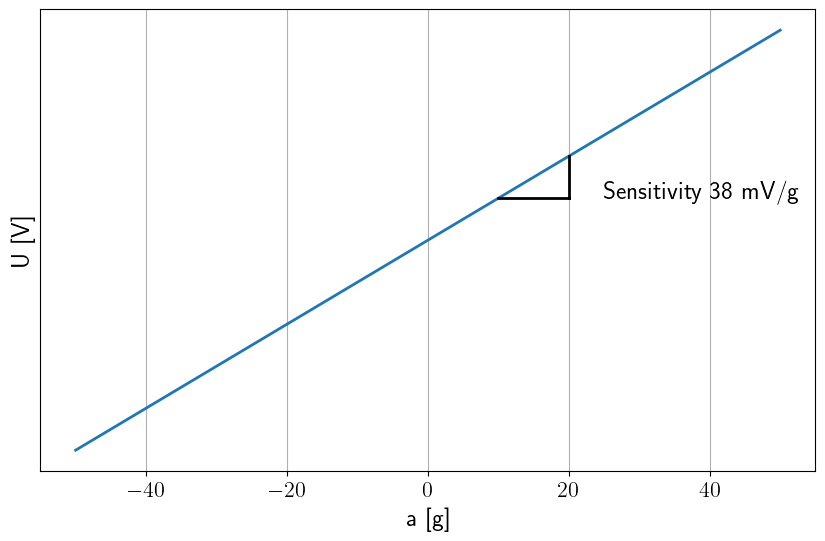

In [3]:
S = 38e-3 # Empfindlichkeit in V/g
a = np.linspace(-50,50,1000) # Beschleunigung in g
offset = 2.5 # später plausibilisieren
U = S*a + offset
plt.plot(a,U)
plt.xlabel('a [g]')
plt.ylabel('U [V]')
plt.plot([10,20],[S*10+offset,S*10+offset],'k-')
plt.plot([20,20],[S*10+offset,S*20+offset],'k-')
plt.text(25,S*10+offset,'Sensitivity 38 mV/g')
plt.yticks([])
plt.grid()
plt.show()

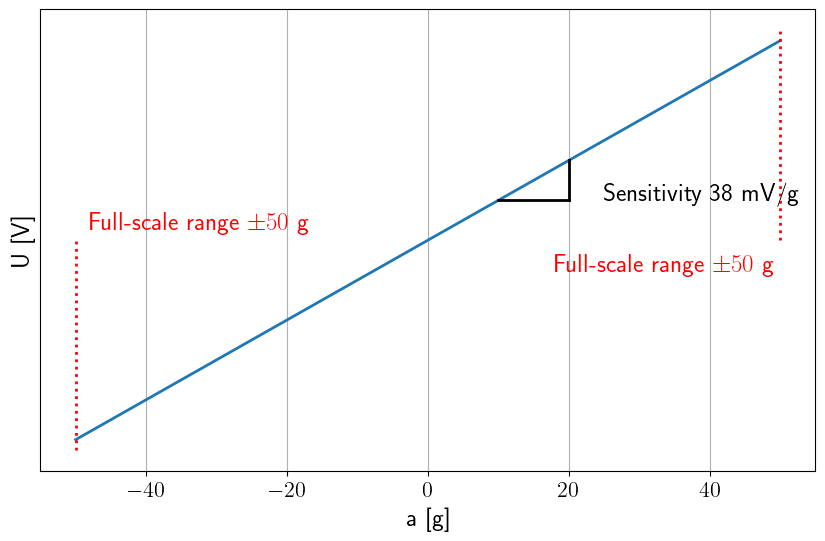

In [4]:
plt.plot(a,U)
plt.xlabel('a [g]')
plt.ylabel('U [V]')
plt.plot([10,20],[S*10+offset,S*10+offset],'k-')
plt.plot([20,20],[S*10+offset,S*20+offset],'k-')
plt.text(25,S*10+offset,'Sensitivity 38 mV/g')
plt.plot([-50,-50],[-2+offset,0+offset],'r:')
plt.plot([50,50],[0+offset,2+offset],'r:')
plt.text(-48,0.1+offset,r'Full-scale range $\pm 50$ g',color='red')
plt.text(18,-0.3+offset,r'Full-scale range $\pm 50$ g',color='red')
plt.yticks([])
plt.grid()
plt.show()

Transfer function form

\begin{equation}
U_{\text{Sensorsystem}} = \frac{U_{\text{Versorgung}}}{2}\pm\alpha+\beta a U_{\text{Versorgung}}
\end{equation}

mit Bias / Offset $\alpha$ : zero-g-offset 0,35 V

und Temperaturkoeffizient $\beta$ (später erklärt)

mit Supply Voltage 4-6 V ergibt sich

In [5]:
US = (4+6)/2 # Mittelwert 4-6 V
alpha = 0.35 # V

bei $a=0$

\begin{equation}
U_{\text{Sensorsystem}}(a=0) = \frac{U_{\text{Versorgung}}}{2}\pm\alpha
\end{equation}

das ist der Offset

In [6]:
a2 = np.linspace(-50,50,3)
beta = 7.6e-3 # bisher unbekannt
U2a = 0.5*US + alpha + a2*beta*US
U2b = 0.5*US - alpha + a2*beta*US

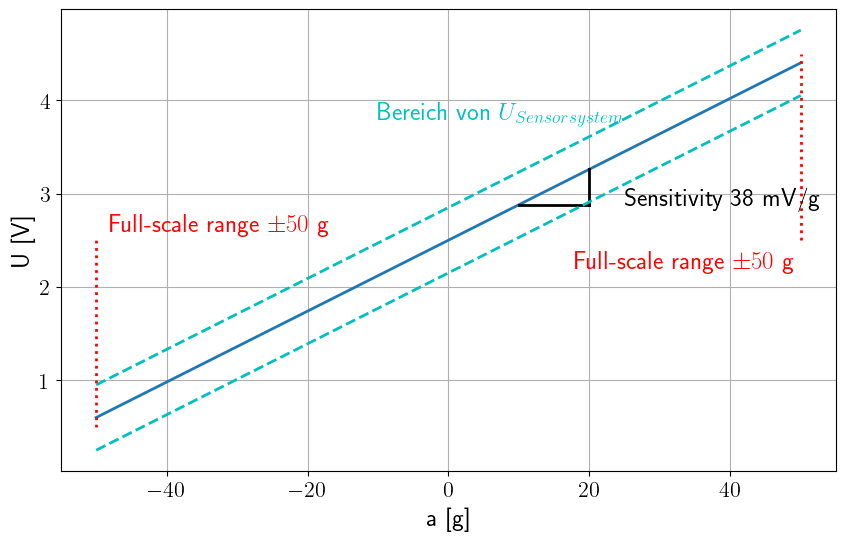

In [7]:
plt.plot(a,U)
plt.xlabel('a [g]')
plt.ylabel('U [V]')
plt.plot([10,20],[S*10+offset,S*10+offset],'k-')
plt.plot([20,20],[S*10+offset,S*20+offset],'k-')
plt.text(25,S*10+offset,'Sensitivity 38 mV/g')
plt.plot([-50,-50],[-2+offset,0+offset],'r:')
plt.plot([50,50],[0+offset,2+offset],'r:')
plt.text(-48,0.1+offset,r'Full-scale range $\pm 50$ g',color='red')
plt.text(18,-0.3+offset,r'Full-scale range $\pm 50$ g',color='red')
plt.plot(a2,U2a,'c--')
plt.plot(a2,U2b,'c--')
plt.text(-10,3.8,r'Bereich von $U_{Sensorsystem}$',color='c')
plt.grid()
plt.show()

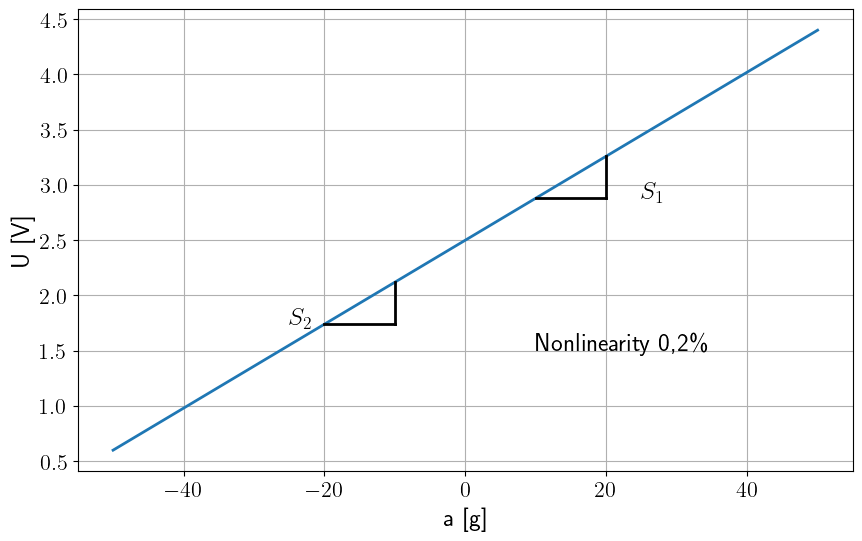

In [8]:
plt.plot(a,U)
plt.xlabel('a [g]')
plt.ylabel('U [V]')
plt.plot([10,20],[S*10+offset,S*10+offset],'k-')
plt.plot([20,20],[S*10+offset,S*20+offset],'k-')
plt.text(25,S*10+offset,r'$S_1$')
plt.plot([-20,-10],[-S*20+offset,-S*20+offset],'k-')
plt.plot([-10,-10],[-S*20+offset,-S*10+offset],'k-')
plt.text(-25,-S*20+offset,r'$S_2$')
plt.text(10,1.5,'Nonlinearity 0,2\%')
plt.grid()
plt.show()

\begin{equation}
\rightarrow \frac{\vert S_1 - S_2 \vert}{S_1}\leq 0,2\text{ Prozent}
\end{equation}

![transverse](../img/system-accelerometer-transverse.png)

der Chip hat einen Kompensations-Pin, über den der Offset bei einer bestimmten Temperatur genullt werden kann, denn der Offset ist temperaturabhängig

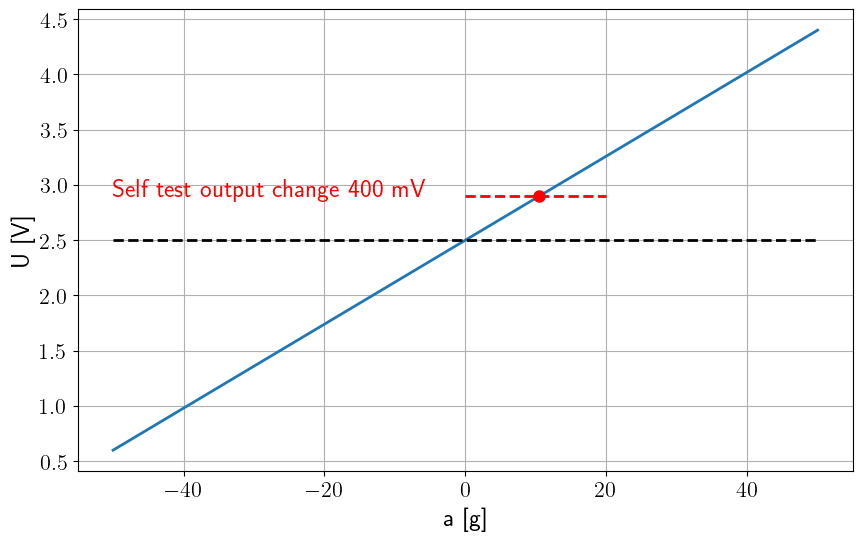

In [9]:
aself = 10.5 # Selbsttest-Beschleunigung in g
Uself = aself*S+offset
plt.plot(a,U)
plt.xlabel('a [g]')
plt.ylabel('U [V]')
plt.plot(aself,Uself,'ro')
plt.text(-50,Uself,'Self test output change 400 mV',color='red')
plt.plot([-50,50],[US/2,US/2],'k--')
plt.plot([0,20],[Uself,Uself],'r--')
plt.grid()
plt.show()

In [10]:
Tmin = -40 # Grad Celsius
Tmax = 85 # Grad Celsius
temp_range = np.linspace(Tmin,Tmax,2)
temp_drift = 0.2 # g bis Tmin oder Tmax

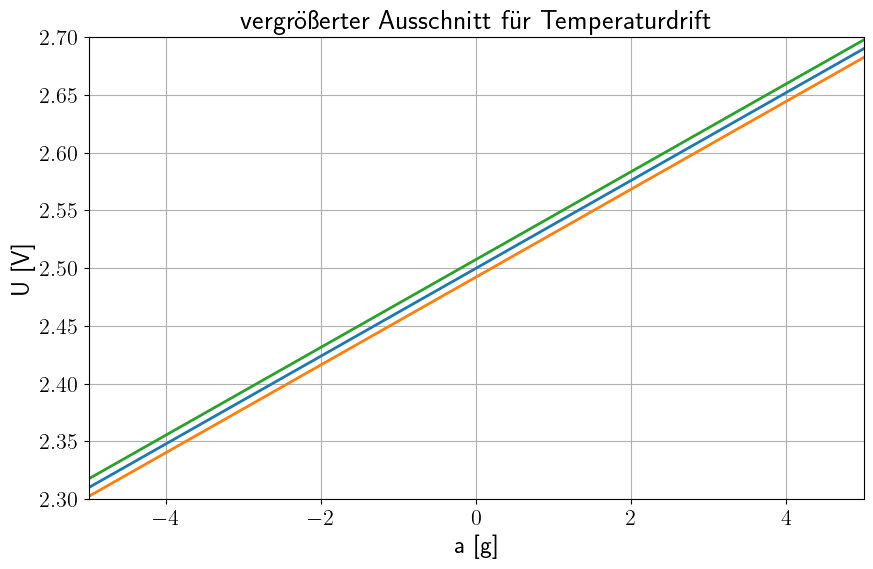

In [11]:
plt.plot(a,U)
plt.xlabel('a [g]')
plt.ylabel('U [V]')
plt.plot(a+temp_drift,U)
plt.plot(a-temp_drift,U)
plt.axis([-5,5,2.3,2.7])
plt.title('vergrößerter Ausschnitt für Temperaturdrift')
plt.grid()
plt.show()

bei $a=0,2 g$ und genulltem Offset: Temperaturdrift wird zur Offset-Begrenzung, d.h. maximaler Offset bei minimaler bzw. maximaler Temperatur ist mit $\beta = 0,0076/g$ dann 

In [12]:
Utempdrift = beta*temp_drift*US
print(str(Utempdrift*1000)+' mV')

7.6000000000000005 mV


im Verhältnis zur maximalen Beschleunigung von 50 g

In [13]:
print(str(100*temp_drift/np.max(a))+' Prozent')

0.4 Prozent


## Übungsaufgaben

### Viertelbrücke

![Viertelbrücke](../img/system-viertel.png)

1. Wie groß ist $U_2$ in Abhängigkeit von $U_0$, $R_x$, $R_1$?
2. Skizzieren Sie $U_d/U_0$ in Abhängigkeit von $R_x$ für den Bereich $0\leq R_x\leq 3R$. Setzen Sie hierzu $R_1 = R_3 = R_4 = R$. Wie groß wird $U_d/U_0$ für $R_x\to\infty$?
3. Nennen Sie drei Sensortypen, die in dieser Beschaltung ausgewertet werden können {cite:p}`becker_aufgabensammlung_2014`.

*Lösung an der Tafel*

### Temperaturfehler in Viertelbrücke

Gegeben ist eine Wheatstone-Messbrücke bestehend aus den beiden Spannungsteilern $R_1$ und $R_2$ bzw. $R_3$ und $R_4$ {cite:p}`becker_aufgabensammlung_2014`.
1. Berechnen Sie allgemein die Diagonalspannung $U_d$. Nehmen Sie nun an, dass $R_1=R_2=R_3=R_4=R =1\text{ k}\Omega$. Welchen Wert hat $U_d$?
2. Mit der Brücke soll die Widerstandsänderung $\Delta R$ eines Sensors, gegeben durch $R_2 = R_x = R_0 + \Delta R + \Delta R_T$ (Temperaturfehler $\Delta R_T$) erfasst werden. Die anderen Brückenwiderstände sind mit $R_0$ anzunehmen. Skizzieren Sie die Schaltung und berechnen Sie $U_d = f(U_0, \Delta R, \Delta R_T, R_0)$. 
3. Die Temperaturabhängigkeit $\Delta R_T$ soll verringert werden. Hierzu steht ein Widerstand mit identischem Temperaturverhalten zur Verfügung: $R_K = R_0 + \Delta R_T$. Zeigen Sie, dass mit Hilfe von $R_K$ der Einfluss von $\Delta R_T$ stark reduziert werden kann. Gehen Sie folgendermaßen vor: a) Geben Sie eine geeignete Brückenschaltung an. b) Berechnen Sie $U_d = f(U_0, \Delta R, \Delta R_T, R_0)$. c) Berechnen Sie die Empfindlichkeit von $U_d$ in Abhängigkeit von $\Delta R_T$ für die beiden Fälle mit und ohne $R_K$. d) Bilden Sie den Quotienten aus den beiden Resultaten.

*Lösung an der Tafel*

### Vollbrücke

![Vollbrücke](../img/system-fullbridge.png)

In einer Wheatstone-Brücke erfahren die Widerstände die im Schaltbild angegebenen Änderungen $\Delta R$ {cite:p}`becker_aufgabensammlung_2014`. 
1. Leiten Sie einen Ausdruck für die Brückendiagonalspannung $U_d$ in Abhängigkeit von der relativen Widerstandsänderung $\Delta R/R$ ab unter der Annahme, dsas die Brücke mit einer konstanten Spannung $U_0$ gespeist wird.
2. Wie Teilaufgabe 1., jedoch unter der Annahme, dass die Brücke mit einem konstanten Strom $I_0$ gespeist wird. Lösung: $U_d = f(I_0, \Delta R)=I_0\cdot \Delta R$
3. Geben Sie die Brückenempfindlichkeit $E$ für 1. und 2. an. $E_U = \frac{dU_d}{d(\Delta R/R)}$, $E_I = \frac{dU_d}{d(\Delta R)}$
4. Nennen Sie zwei physikalische Größen, die sich mit solch einer Anordnung messen lassen. Welche Sensortypen werden verwendet?

*Lösung an der Tafel*

### Querempfindlichkeit

![Brücke](../img/system-bridge.png)

Zwei Dehnungsmessstreifen werden zur Messung einer Dehnung $\varepsilon$ eingesetzt {cite:p}`muhl_einfuhrung_2014`.

Dehnungsmessstreifen: <br>
$R_1 = 350\text{ }\Omega \cdot (1+ 2,0\cdot\varepsilon)$<br>
$R_2 = 350\text{ }\Omega \cdot (1- 2,0\cdot \varepsilon)$

Speisespannung $U_0 = 5\text{ V}$

1. Dimensionieren Sie $R_3$ und $R_4$ so, dass die folgenden Bedingungen erfüllt werden: a) Ausgangsspannung $U_a$ im ungedehnten Zustand $U_a(\varepsilon=0)=0\text{ V}$, b) Bei einer Belastung der Ausgangsspannung mit einem Widerstand von $100\text{  k}\Omega$ soll der Betrag der relativen Messabweichung kleiner als 0,5% sein (hierbei Annahme: $R_1\approx R_2 \approx 350\text{ }\Omega$). 
2. Bestimmen Sie die Empfindlichkeit der Brückenschaltung für die Dehnungsmessung.

*Lösung an der Tafel*

### Temperaturabhängigkeit

Ein Fühler ändert seinen Widerstand $R$ mit der Temperatur $T$ nach dem Zusammenhang {cite:p}`kurzweil_physik_2018`

\begin{equation}
R = R_0 \cdot e^{\beta\left(\frac{1}{T}-\frac{1}{T_0}\right)}
\end{equation}

mit Bezugswiderstand $R_0 = 1\text{ k}\Omega$, Bezugstemperatur $T_0 = 273,15\text{ K}$, Materialkonstante $\beta = 3\cdot10^3 \text{ K}$ und Arbeitspunkttemperatur $T_A = 300\text{ K}$.

1. Ist der Widerstand ein Heiß- oder ein Kaltleiter und woran ist dies zu erkennen? Aus welchem Material sind derartige Temperaturfühler? Geben Sie die Eingangs- und Ausgangsgröße des Temperaturfühlers an.
2. Bestimmen Sie den Widerstand $R(T_A)$ am Arbeitspunkt.
3. Bestimmen Sie allgemein die Empfindlichkeit $E(T)=\frac{\partial R}{\partial T}$ des Fühlers und berechnen Sie $E(T_A)$ am Arbeitspunkt. 
4. Die Widerstandskennlinie $R(T)$ kann am Arbeitspunkt durch eine lineare Funktion $R_{\text{lin}}(T) = R(T_A) + \frac{d R(T_A)}{dT}\cdot (T-T_A)$ angenähert werden. Geben Sie $R_{\text{lin}}(T)$ an. 
5. Berechnen Sie den absoluten und relativen Linearitätsfehler, wenn an Stelle von $R(T)$ mit $R_{\text{lin}}(T)$ gerechnet wird und sich die Tempeartur auf $T_2 = 310\text{ K}$ geändert hat.

*Lösung an der Tafel*

```{bibliography}
:filter: docname in docnames
```